In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_o = pd.read_csv("/content/drive/My Drive/Colab Notebooks/card_transaction.v1.csv")
# cards=pd.read_csv("/content/drive/My Drive/Colab Notebooks/sd254_cards.csv")[['User','CARD INDEX','Card Type']]

In [ ]:
df_o=pd.merge(df_o,cards,how='left',left_on=['User','Card'],right_on=['User','CARD INDEX'])
df_o=df_o[df_o['Card Type']=='Credit']
df_o

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Type
10546,0,3,2003,1,1,06:25,$130.23,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,3,Credit
10547,0,3,2003,1,1,06:47,$73.61,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,3,Credit
10548,0,3,2003,1,2,07:23,$127.26,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
10549,0,3,2003,1,3,06:42,$40.52,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
10550,0,3,2003,1,4,06:00,$142.91,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No,1,Credit
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No,1,Credit
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No,1,Credit
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No,1,Credit


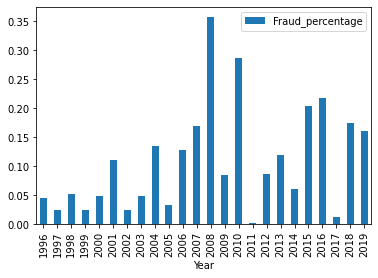

In [ ]:
import matplotlib.pyplot as plt
df_fraud=df_o[['User','Year','Is Fraud?']].groupby(['Year','Is Fraud?']).count().reset_index()
df_fraud_dict=df_fraud.groupby('Year')['User'].sum().to_dict()
df_fraud['Total']=df_fraud['Year'].map(df_fraud_dict)
df_fraud['Fraud_percentage']=(df_fraud["User"]/df_fraud['Total'])*100
df_fraud[['Year','Is Fraud?','Fraud_percentage']]
df_fraud=df_fraud.rename(columns={'Is Fraud?':"Fraud"})
df_fraud=df_fraud[df_fraud["Fraud"]!="No"]
df_fraud.plot(x="Year",y=['Fraud','Fraud_percentage'],kind="bar")

In [ ]:
# df_1=df_o[(df_o['Year']==2019)|(df_o['Year']==2018)|(df_o['Year']==2017)]
df_1=df_o[(df_o['Year']==2008)]
df_1
df_1.to_csv("/content/drive/My Drive/Colab Notebooks/card_transaction_2008.csv",index= False)

In [ ]:
# start from here
# 请从这里开始
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/card_transaction_2008.csv")
cards=pd.read_csv("/content/drive/My Drive/Colab Notebooks/sd254_cards.csv")
usrs=pd.read_csv("/content/drive/My Drive/Colab Notebooks/sd254_users.csv")

In [ ]:
#1.amount 提取
def amount_to_int(z):
  return float(z.replace("$",""))
df['Amount']=df['Amount'].apply(amount_to_int)
df[df['Is Fraud?']=='Yes']

AttributeError: ignored

In [ ]:
df[df['Is Fraud?']=='Yes']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
1018,0,3,2008,10,10,09:37,11.04,Swipe Transaction,1913477460590765860,Pasadena,CA,91106.0,5300,NaN,Yes
1023,0,3,2008,10,12,11:52,68.86,Swipe Transaction,-245178307025547046,Upland,CA,91786.0,5311,NaN,Yes
1024,0,3,2008,10,12,15:54,96.19,Swipe Transaction,3189517333335617109,La Verne,CA,91750.0,5311,NaN,Yes
1025,0,3,2008,10,12,15:58,298.00,Swipe Transaction,1715299929786123066,Corona,CA,92881.0,3722,NaN,Yes
1027,0,3,2008,10,13,07:02,3.72,Swipe Transaction,1971441525886001364,Upland,CA,91784.0,5300,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222195,1996,3,2008,8,31,07:04,360.00,Online Transaction,-112121233619748226,ONLINE,NaN,NaN,3509,NaN,Yes
1222196,1996,3,2008,8,31,09:55,0.45,Online Transaction,8376042053629658626,ONLINE,NaN,NaN,4131,NaN,Yes
1222197,1996,3,2008,8,31,09:59,45.76,Swipe Transaction,-6335581086960426154,Cincinnati,OH,45232.0,5211,NaN,Yes
1222198,1996,3,2008,9,1,06:13,-360.00,Online Transaction,-112121233619748226,ONLINE,NaN,NaN,3509,NaN,Yes


In [ ]:
#2.对时间进行处理
# df['trans_date_trans_time'] = pd.to_datetime(df['Year']+'-'+df['Month']+'-'+df['Day']+' '+df['Time'])
def data_time(Year,Month,Day,Time):
  return pd.to_datetime(str(Year)+'-'+str(Month)+'-'+str(Day)+' '+Time)
df['trans_date_trans_time'] =df[['Year','Month','Day','Time']].apply(lambda z: data_time(*z), axis=1)
df.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing.csv",index= True)

In [ ]:
#3.对MCC进行分类
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
def to_catogory(z):
  if 1 <=z<= 1499:
    return 'Agricultural Services'
  if 1500 <=z<= 2999:
    return 'Contracted Services'
  if 3000 <=z<= 3299:
    return '(T&E) Airlines'
  if 3300 <=z<= 3499:
    return '(T&E) Car Rental'
  if 3500 <=z<= 3999:
    return '(T&E) Lodging'
  if 4000 <=z<= 4799:
    return 'Transportation Services'
  if 4800 <=z<= 4999:
    return 'Utility Services'
  if 5000 <=z<= 5599:
    return 'Retail Outlet Services'
  if 5600 <=z<= 5699:
    return 'Clothing Stores'
  if 5700 <=z<= 7299:
    return 'Miscellaneous Stores'
  if 7300 <=z<= 7999:
    return 'Business Services'
  if 8000 <=z<= 8999:
    return 'Professional Services and Membership Organizations'
  if 9000 <=z<= 9999:
    return 'Government Services'
df['category']=df[['MCC']].apply(lambda z:to_catogory(*z),axis=1)
df.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing.csv",index= True)

In [ ]:
#4.从user里提取gender，age，latitude，longtitude
users=pd.read_csv("/content/drive/My Drive/Colab Notebooks/sd254_users.csv")
users['index']=users.index
df=pd.merge(df,users,how='left',left_on='User',right_on='index')
df.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing.csv",index= True)

In [ ]:
# df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing.csv")
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing.csv")

FileNotFoundError: ignored

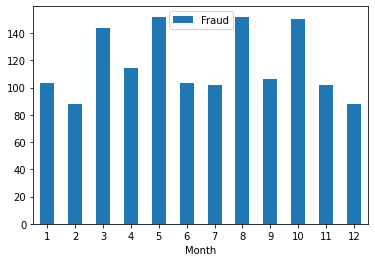

In [ ]:
import matplotlib.pyplot as plt
df_fraud=df[['User','Month','Is Fraud?']].groupby(['Month','Is Fraud?']).count().reset_index()
df_fraud_dict=df_fraud.groupby('Month')['User'].sum().to_dict()
df_fraud['Total']=df_fraud['Month'].map(df_fraud_dict)
df_fraud=df_fraud.rename(columns={'Is Fraud?':"Fraud"})
df_fraud_filter=df_fraud[df_fraud['Fraud']=='Yes'].drop(['Fraud','Total'],axis=1).rename(columns={'User':'Fraud'})
df_fraud_filter=df_fraud_filter.set_index('Month')
df_fraud_filter.plot.bar(rot=0)

In [ ]:
df=df[(df['Month']==10)|(df['Month']==11)]
# df=df[(df['Month']==7)|(df['Month']==8)|(df['Month']==9)|(df['Month']==10)|(df['Month']==11)|(df['Month']==12)]
print(len(df))
df[df['Is Fraud?']=='Yes']
df=df.drop(['Unnamed: 0'],axis=1).reset_index(drop=True)
df.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month.csv",index= True)

213351


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month.csv")

In [ ]:
df1=df
df1['Card']=df1['Card'].apply(str)
df1['User']=df1['User'].apply(str)
# df1.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_str(user+card).csv",index= True)
df1['cc_num'] = df['User']+'_'+df['Card']
df1['val_for_agg'] = 1
df1.index = pd.to_datetime(df['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1= df1.sort_index()
# 计算60天内交易记录数
df_hist_trans_60d=df1.groupby(['cc_num'])['val_for_agg'].rolling('60D').count().shift(1).reset_index().fillna(0)
df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()
df_hist_trans_60d


,cc_num,trans_date,hist_trans_60d
0,0_0,2008-10-01,0.0
1,0_0,2008-10-02,1.0
2,0_0,2008-10-04,4.0
3,0_0,2008-10-05,6.0
4,0_0,2008-10-07,7.0
...,...,...,...
94260,999_3,2008-11-23,48.0
94261,999_3,2008-11-27,49.0
94262,999_3,2008-11-28,51.0
94263,999_3,2008-11-29,52.0


In [ ]:
#计算24小时以内的交易数
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [ ]:
#24小时内的诈骗交易数
df_hist_fraud_trans_24h = \
    df1[df1['Is Fraud?']== 'Yes']\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [ ]:
df_hist_fraud_trans_2h = \
    df1[df1['Is Fraud?']== 'Yes']\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [ ]:
#60天内平均的花费数
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['Amount']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)
df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()
df_hist_trans_amt_avg_60d['trans_date']

0        2008-10-01
1        2008-10-02
2        2008-10-04
3        2008-10-05
4        2008-10-07
            ...    
94260    2008-11-23
94261    2008-11-27
94262    2008-11-28
94263    2008-11-29
94264    2008-11-30
Name: trans_date, Length: 94265, dtype: object

In [ ]:
#把交易记录都结合
df1['trans_date_trans_time']=df1['trans_date_trans_time'].apply(pd.to_datetime)
df1['trans_date'] = df1['trans_date_trans_time'].apply(pd.to_datetime).dt.date
df2 = pd.merge(df1,df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2 = pd.merge(df2,df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = pd.merge(df2,df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = pd.merge(df2,df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = pd.merge(df2,df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)
df2.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index,cc_num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,88712,841,2,2008,10,1,00:00,91.89,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No,2008-10-01 00:00:00,0,Wednesday,Retail Outlet Services,Elliot Harris,62,68,1957,11,Male,878 Forest Street,NaN,Columbus,OH,43228,39.98,-82.98,$18420,$37556,$0,735,6,841,841_2,1,2008-10-01,1.0,4.0,0.0,0.0,46.384857
1,123265,1130,0,2008,10,1,00:02,120.00,Swipe Transaction,-4282466774399734331,Vista,CA,92084.0,4829,NaN,No,2008-10-01 00:02:00,0,Wednesday,Utility Services,Khari Sadr,49,65,1970,4,Male,2379 Forest Lane,NaN,Oceanside,CA,92058,33.18,-117.29,$16894,$34449,$36540,686,3,1130,1130_0,1,2008-10-01,1.0,6.0,0.0,0.0,31.075346
2,122263,1120,0,2008,10,1,00:05,11.34,Swipe Transaction,-727612092139916043,Central City,IA,52214.0,5411,NaN,No,2008-10-01 00:05:00,0,Wednesday,Retail Outlet Services,Adrian Rogers,38,70,1981,3,Male,2750 Rose Boulevard,NaN,Postville,IA,52162,43.08,-91.56,$13332,$27183,$58323,637,1,1120,1120_0,1,2008-10-01,73.0,3.0,0.0,0.0,37.874247
3,103076,959,4,2008,10,1,00:10,8.79,Swipe Transaction,-8513351063274937964,Flushing,NY,11355.0,5813,NaN,No,2008-10-01 00:10:00,0,Wednesday,Miscellaneous Stores,Briar Reed,91,70,1928,9,Female,984 Little Creek Lane,501.0,Flushing,NY,11355,40.77,-73.84,$13810,$17150,$375,807,6,959,959_4,1,2008-10-01,53.0,4.0,0.0,0.0,50.690000
4,28020,255,5,2008,10,1,00:13,12.28,Swipe Transaction,97032797689821735,Duncombe,IA,50532.0,5411,NaN,No,2008-10-01 00:13:00,0,Wednesday,Retail Outlet Services,Paola Braun,61,60,1958,5,Female,1861 Fourth Boulevard,NaN,Badger,IA,50516,42.61,-94.14,$18849,$18452,$16827,741,6,255,255_5,1,2008-10-01,31.0,4.0,0.0,0.0,42.809032


In [ ]:
df2=df2.sort_values('Unnamed: 0').reset_index(drop=True)
df2=df2.rename(columns={'Unnamed: 0':'index','Errors?':'Errors','Is Fraud?':'Fraud'})
df2=df2.rename(columns={'Errors?':'Errors','Is Fraud?':'Fraud'})
import pandas as pd
df2=df2.rename(columns={'trans_hour':'Trans_hour','day_of_week':'Day_of_week','category':'MCC_Category'})
df2.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist.csv",index= True)

In [ ]:
import pandas as pd
df2=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist.csv")

In [ ]:
df2

,Unnamed: 0,index,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors,Fraud,CARD INDEX,Card Type,trans_date_trans_time,Trans_hour,Day_of_week,MCC_Category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index.1,cc_num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,0,0,0,3,2008,7,1,05:48,126.41,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,3,Credit,2008-07-01 05:48:00,5,Tuesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_3,1,2008-07-01,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,3,2008,7,1,06:25,146.35,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No,3,Credit,2008-07-01 06:25:00,6,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_3,1,2008-07-01,0.0,1.0,0.0,0.0,0.000000
2,2,2,0,3,2008,7,1,13:49,54.31,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,NaN,No,3,Credit,2008-07-01 13:49:00,13,Tuesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_3,1,2008-07-01,0.0,2.0,0.0,0.0,0.000000
3,3,3,0,3,2008,7,1,20:03,170.40,Swipe Transaction,838425044734233142,Mira Loma,CA,91752.0,4814,NaN,No,3,Credit,2008-07-01 20:03:00,20,Tuesday,Utility Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_3,1,2008-07-01,0.0,3.0,0.0,0.0,0.000000
4,4,4,0,3,2008,7,2,06:11,112.49,Swipe Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No,3,Credit,2008-07-02 06:11:00,6,Wednesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_3,1,2008-07-02,4.0,4.0,0.0,0.0,124.367500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205725,205725,203341,1997,1,2008,12,29,05:45,2.51,Swipe Transaction,-4531641834336874998,Elizabeth,NJ,7201.0,5411,NaN,No,1,Credit,2008-12-29 05:45:00,5,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,2008-12-29,175.0,1.0,0.0,0.0,35.366686
205726,205726,203342,1997,1,2008,12,29,06:08,41.01,Swipe Transaction,-2674390926778027106,Elizabeth,NJ,7201.0,5211,NaN,No,1,Credit,2008-12-29 06:08:00,6,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,2008-12-29,175.0,2.0,0.0,0.0,35.366686
205727,205727,203343,1997,1,2008,12,29,11:17,3.18,Swipe Transaction,4722913068560264812,Elizabeth,NJ,7202.0,5411,NaN,No,1,Credit,2008-12-29 11:17:00,11,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,2008-12-29,175.0,3.0,0.0,0.0,35.366686
205728,205728,203344,1997,1,2008,12,30,11:03,2.83,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,1,Credit,2008-12-30 11:03:00,11,Tuesday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,2008-12-30,175.0,4.0,0.0,0.0,35.535771


In [ ]:
columns=['index','Amount','Use Chip','Errors','Fraud','Trans_hour','Day_of_week','MCC_Category','Current Age','Gender','Latitude','Longitude','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d']
df_train=df2[columns]

In [ ]:
#One Hot_Encoding
# Use_Chip = pd.get_dummies(df_train['Use Chip'], prefix='User_Chip', drop_first=True)
# category_onehot = pd.get_dummies(df_train.MCC_Category, prefix='Category', drop_first=True)
# gender_onehot = pd.get_dummies(df_train.Gender, prefix='Gender', drop_first=True)
# day_of_week_onehot = pd.get_dummies(df_train.Day_of_week, prefix='Week',drop_first=True)

In [ ]:
#1.MCC_Category编码
Dict={}
Category_Dict={}
x=0
for i in df_train['MCC_Category'].unique():
  Dict[i]=x
  x=x+1
Category_Dict['MCC_Category']=Dict
df_train.replace(Category_Dict,inplace=True)
# Category_Dict  
df_train.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
215918,213346,149.39,Swipe Transaction,NaN,No,16,Saturday,6,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215919,213347,30.55,Swipe Transaction,NaN,No,18,Saturday,0,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215920,213348,14.59,Swipe Transaction,NaN,No,19,Saturday,0,47,Female,40.66,-74.19,147.0,4.0,0.0,42.185405
215921,213349,32.47,Swipe Transaction,NaN,No,19,Sunday,0,47,Female,40.66,-74.19,151.0,4.0,0.0,42.635563
215922,213350,34.69,Swipe Transaction,NaN,No,19,Sunday,0,47,Female,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
#2. Errors编码
df_train=df_train.fillna(value={'Errors':0})
Dict={}
Erros_Dict={}
x=1
for i in df_train['Errors'].unique():
  if i!=0:
    Dict[i]=x
    x=x+1
Erros_Dict['Errors']=Dict
ddf_train=df_train.replace(Erros_Dict,inplace=True)
df_train.tail()
# df_train[df_train['Errors'].notnull()]
# df_train[df_train['Errors']=='Insufficient Balance,']

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
215918,213346,149.39,Swipe Transaction,0,No,16,Saturday,6,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215919,213347,30.55,Swipe Transaction,0,No,18,Saturday,0,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215920,213348,14.59,Swipe Transaction,0,No,19,Saturday,0,47,Female,40.66,-74.19,147.0,4.0,0.0,42.185405
215921,213349,32.47,Swipe Transaction,0,No,19,Sunday,0,47,Female,40.66,-74.19,151.0,4.0,0.0,42.635563
215922,213350,34.69,Swipe Transaction,0,No,19,Sunday,0,47,Female,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
#3. 星期编码
Dict={}
Day_of_week_Dict={}
Dict['Monday']=0
Dict['Tuesday']=1
Dict['Wednesday']=2
Dict['Thursday']=3
Dict['Friday']=4
Dict['Saturday']=5
Dict['Sunday']=6
Day_of_week_Dict['Day_of_week']=Dict
df_train.replace(Day_of_week_Dict,inplace=True)
df_train.tail()

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
215918,213346,149.39,Swipe Transaction,0,No,16,5,6,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215919,213347,30.55,Swipe Transaction,0,No,18,5,0,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
215920,213348,14.59,Swipe Transaction,0,No,19,5,0,47,Female,40.66,-74.19,147.0,4.0,0.0,42.185405
215921,213349,32.47,Swipe Transaction,0,No,19,6,0,47,Female,40.66,-74.19,151.0,4.0,0.0,42.635563
215922,213350,34.69,Swipe Transaction,0,No,19,6,0,47,Female,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
#4. 二进制数编码
df_train=df_train.replace('Swipe Transaction',0)
df_train=df_train.replace('Online Transaction',1)
df_train=df_train.replace('No',0)
df_train=df_train.replace('Yes',1)
df_train=df_train.replace('Female',0)
df_train=df_train.replace('Male',1)
# df_train=df_train.astype('float64')
df_train.tail()

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
215918,213346,149.39,0,0,0,16,5,6,47,0,40.66,-74.19,147.0,3.0,0.0,42.185405
215919,213347,30.55,0,0,0,18,5,0,47,0,40.66,-74.19,147.0,3.0,0.0,42.185405
215920,213348,14.59,0,0,0,19,5,0,47,0,40.66,-74.19,147.0,4.0,0.0,42.185405
215921,213349,32.47,0,0,0,19,6,0,47,0,40.66,-74.19,151.0,4.0,0.0,42.635563
215922,213350,34.69,0,0,0,19,6,0,47,0,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
df_train.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode.csv",index= False)

In [ ]:
# df_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode.csv")

In [ ]:
# df_train.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode_standarize.csv",index= False)

In [ ]:
# df_train=df_train.drop(['Latitude','Longitude'],axis=1)
#As this dataset is highly imbalance we have to balance this by over sampling
# df2=df_train
# cnt_non_fraud = df2[df2['Fraud'] ==0]['Amount'].count()
# df2_class_fraud = df2[df2['Fraud'] == 1]
# df2_class_nonfraud = df2[df2['Fraud'] == 0]
# #OverSampling
# df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
# df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

# print('Random over-sampling:')
# print(df2_oversampled['Fraud'].value_counts())

Random over-sampling:
1    214956
0    214956
Name: Fraud, dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler
#RobustScaler is less prone to outliers.
# df_train=df2_oversampled
rob_scaler = RobustScaler()
for i in df_train.columns:
  if (i!='Fraud') & (i!='index'):
    df_train[i] = rob_scaler.fit_transform(df_train[i].values.reshape(-1,1))
# df_train=rob_scaler.fit_transform(df_train)
# df_train=pd.DataFrame(df_train,columns=df2_oversampled.columns)
df_train=df_train.astype('float64')
df_train

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,0.0,-0.403646,1.0,0.0,0.0,0.714286,-0.25,-1.0,0.047619,0.0,-0.553741,-1.841428,-0.675676,-1.5,0.0,-1.354625
1,1.0,1.828299,0.0,0.0,0.0,-1.000000,0.00,0.0,0.047619,0.0,-0.553741,-1.841428,-0.662162,-1.0,0.0,-1.076365
2,2.0,0.353993,0.0,0.0,0.0,-0.857143,0.00,0.0,0.047619,0.0,-0.553741,-1.841428,-0.662162,-0.5,0.0,-1.076365
3,3.0,0.347396,0.0,0.0,0.0,0.142857,0.00,0.0,0.047619,0.0,-0.553741,-1.841428,-0.662162,0.0,0.0,-1.076365
4,4.0,-0.361458,0.0,0.0,0.0,0.142857,0.50,0.0,0.047619,0.0,-0.553741,-1.841428,-0.621622,0.5,0.0,0.482248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215918,213346.0,2.054861,0.0,0.0,0.0,0.571429,0.50,5.0,-0.238095,0.0,0.331973,0.708016,1.310811,0.0,0.0,0.154181
215919,213347.0,-0.008333,0.0,0.0,0.0,0.857143,0.50,-1.0,-0.238095,0.0,0.331973,0.708016,1.310811,0.0,0.0,0.154181
215920,213348.0,-0.285417,0.0,0.0,0.0,1.000000,0.50,-1.0,-0.238095,0.0,0.331973,0.708016,1.310811,0.5,0.0,0.154181
215921,213349.0,0.025000,0.0,0.0,0.0,1.000000,0.75,-1.0,-0.238095,0.0,0.331973,0.708016,1.364865,0.5,0.0,0.170281


In [ ]:
df_train.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode_standarize.csv",index= False)

In [ ]:
df2_oversampled


,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,0,-0.481084,1.0,0.0,0,1.000000,-0.333333,-1.0,-0.10,0.0,-0.592233,-0.953394,-0.656250,-1.000000,0.0,-1.317076
1,1,0.941040,0.0,0.0,0,-1.000000,0.000000,0.0,-0.10,0.0,-0.592233,-0.953394,-0.640625,-0.666667,0.0,-1.052046
2,2,0.001659,0.0,0.0,0,-0.833333,0.000000,0.0,-0.10,0.0,-0.592233,-0.953394,-0.640625,-0.333333,0.0,-1.052046
3,3,-0.002544,0.0,0.0,0,0.333333,0.000000,0.0,-0.10,0.0,-0.592233,-0.953394,-0.640625,0.000000,0.0,-1.052046
4,4,-0.454204,0.0,0.0,0,0.333333,0.666667,0.0,-0.10,0.0,-0.592233,-0.953394,-0.593750,0.333333,0.0,0.432463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151643,149727,3.079535,1.0,0.0,1,-0.166667,1.000000,0.0,-0.80,0.0,0.314840,0.407257,-0.046875,0.666667,0.5,0.825947
8078,7990,-5.766261,0.0,0.0,1,-0.500000,-1.000000,8.0,1.35,1.0,-1.237171,-0.317798,0.890625,2.333333,1.0,0.344723
59801,59071,0.718695,0.0,0.0,1,0.500000,0.000000,1.0,1.75,0.0,0.453537,0.417892,0.093750,-0.333333,1.0,-0.438277
184844,182634,0.860951,1.0,1.0,1,-0.666667,0.000000,1.0,-0.90,1.0,0.574202,0.121989,0.718750,-0.666667,0.5,0.378865


In [ ]:
df2.to_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode_oversample.csv",index= False)

#训练模型

In [ ]:
from sklearn.model_selection import train_test_split
df2_oversampled=df_train
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled.drop('Fraud',axis=1),df2_oversampled['Fraud'] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(151146, 14)

In [ ]:
X_test.shape

(64777, 14)

Logistic regression


In [ ]:
#Importing Library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
#Building Logistic Regression  Model
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[150454      1]
 [     8    683]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    150455
         1.0       1.00      0.99      0.99       691

    accuracy                           1.00    151146
   macro avg       1.00      0.99      1.00    151146
weighted avg       1.00      1.00      1.00    151146



In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[64513     1]
 [   52 64408]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64514
         1.0       1.00      1.00      1.00     64460

    accuracy                           1.00    128974
   macro avg       1.00      1.00      1.00    128974
weighted avg       1.00      1.00      1.00    128974



In [ ]:
y_test_pred

array([0., 1., 1., ..., 0., 1., 1.])

In [ ]:
df2.rename(columns={'trans_hour':'Trans_hour','day_of_week':'Day_of_week','category':'MCC_Category'})

,index,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors,Fraud,trans_date_trans_time,Trans_hour,Day_of_week,MCC_Category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index,cc_num,num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,0,0,0,2008,10,1,17:59,7.78,Online Transaction,-521141999023077663,ONLINE,NaN,NaN,5815,NaN,No,2008-10-01 17:59:00,17,Wednesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-01,0.0,0.0,0.0,0.0,0.000000
1,1,0,0,2008,10,2,05:39,136.34,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-10-02 05:39:00,5,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,1.0,0.0,0.0,7.780000
2,2,0,0,2008,10,2,06:32,51.42,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 06:32:00,6,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,2.0,0.0,0.0,7.780000
3,3,0,0,2008,10,2,13:57,51.04,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 13:57:00,13,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,3.0,0.0,0.0,7.780000
4,4,0,0,2008,10,4,13:15,10.21,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-04 13:15:00,13,Saturday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-04,4.0,4.0,0.0,0.0,51.358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215918,213346,1997,1,2008,11,29,16:20,149.39,Swipe Transaction,4597119782650359103,Elizabeth,NJ,7201.0,8043,NaN,No,2008-11-29 16:20:00,16,Saturday,Professional Services and Membership Organizat...,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
215919,213347,1997,1,2008,11,29,18:20,30.55,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,2008-11-29 18:20:00,18,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
215920,213348,1997,1,2008,11,29,19:33,14.59,Swipe Transaction,-9095045032266102734,Elizabeth,NJ,7201.0,5813,NaN,No,2008-11-29 19:33:00,19,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,4.0,0.0,0.0,42.185405
215921,213349,1997,1,2008,11,30,19:05,32.47,Swipe Transaction,-4500542936415012428,Jenkintown,PA,19046.0,5814,NaN,No,2008-11-30 19:05:00,19,Sunday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-30,151.0,4.0,0.0,0.0,42.635563


In [ ]:
df1[df1['Is Fraud?']== 'No']
df1['trans_date'] = df1['trans_date_trans_time'].apply(pd.to_datetime).dt.date

In [ ]:
df1_10=df1.groupby(['cc_num'])['num'].rolling('60D').count().reset_index().fillna(0).head(10)
pd.set_option('display.max_rows', df1_10.shape[0])
df1_10

,cc_num,time_index,num
0,0_0,2008-10-01 17:59:00,1.0
1,0_0,2008-10-02 05:39:00,2.0
2,0_0,2008-10-02 06:32:00,3.0
3,0_0,2008-10-02 13:57:00,4.0
4,0_0,2008-10-04 13:15:00,5.0
5,0_0,2008-10-04 19:28:00,6.0
6,0_0,2008-10-05 06:38:00,7.0
7,0_0,2008-10-07 06:22:00,8.0
8,0_0,2008-10-10 13:23:00,9.0
9,0_0,2008-10-12 11:43:00,10.0


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month.csv")
df_11=df
df_11['card']=df_11['Card'].apply(str)
df_11

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index,card
0,0,0,0,2008,10,1,17:59,7.78,Online Transaction,-521141999023077663,ONLINE,NaN,NaN,5815,NaN,No,2008-10-01 17:59:00,17,Wednesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0
1,1,0,0,2008,10,2,05:39,136.34,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-10-02 05:39:00,5,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0
2,2,0,0,2008,10,2,06:32,51.42,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 06:32:00,6,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0
3,3,0,0,2008,10,2,13:57,51.04,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 13:57:00,13,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0
4,4,0,0,2008,10,4,13:15,10.21,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-04 13:15:00,13,Saturday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213346,213346,1997,1,2008,11,29,16:20,149.39,Swipe Transaction,4597119782650359103,Elizabeth,NJ,7201.0,8043,NaN,No,2008-11-29 16:20:00,16,Saturday,Professional Services and Membership Organizat...,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1
213347,213347,1997,1,2008,11,29,18:20,30.55,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,2008-11-29 18:20:00,18,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1
213348,213348,1997,1,2008,11,29,19:33,14.59,Swipe Transaction,-9095045032266102734,Elizabeth,NJ,7201.0,5813,NaN,No,2008-11-29 19:33:00,19,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1
213349,213349,1997,1,2008,11,30,19:05,32.47,Swipe Transaction,-4500542936415012428,Jenkintown,PA,19046.0,5814,NaN,No,2008-11-30 19:05:00,19,Sunday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1


In [ ]:

df = df.astype({"User":str, "Card": str})
df

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index
0,0,0,"Card 0\nName: 0, dtype: int64",2008,1,1,06:34,90.39,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No,2008-01-01 06:34:00,6,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
1,1,0,"Card 0\nName: 1, dtype: int64",2008,1,1,13:06,66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:06:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
2,2,0,"Card 0\nName: 2, dtype: int64",2008,1,1,13:14,-66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:14:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
3,3,0,"Card 0\nName: 3, dtype: int64",2008,1,1,13:15,43.06,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:15:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
4,4,0,"Card 0\nName: 4, dtype: int64",2008,1,1,13:19,10.22,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No,2008-01-01 13:19:00,13,Tuesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223455,1223455,1997,"Card 1\nName: 1223455, dtype: int64",2008,12,29,05:45,2.51,Swipe Transaction,-4531641834336874998,Elizabeth,NJ,7201.0,5411,NaN,No,2008-12-29 05:45:00,5,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223456,1223456,1997,"Card 1\nName: 1223456, dtype: int64",2008,12,29,06:08,41.01,Swipe Transaction,-2674390926778027106,Elizabeth,NJ,7201.0,5211,NaN,No,2008-12-29 06:08:00,6,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223457,1223457,1997,"Card 1\nName: 1223457, dtype: int64",2008,12,29,11:17,3.18,Swipe Transaction,4722913068560264812,Elizabeth,NJ,7202.0,5411,NaN,No,2008-12-29 11:17:00,11,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223458,1223458,1997,"Card 1\nName: 1223458, dtype: int64",2008,12,30,11:03,2.83,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,2008-12-30 11:03:00,11,Tuesday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997


In [ ]:
df[['Card']].apply(lambda z: str(z),axis=1)

KeyboardInterrupt: ignored

In [ ]:
if 2<=5<=4:
  print("yes")
df['Errors?'].unique()
# df[(df['Errors?'].notnull()) & (df['Is Fraud?']!='No')]
users[users['Person']=='Annika Russell']

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997


In [ ]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index
0,0,0,2008,1,1,06:34,90.39,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No,2008-01-01 06:34:00,6,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
1,0,0,2008,1,1,13:06,66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:06:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
2,0,0,2008,1,1,13:14,-66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:14:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
3,0,0,2008,1,1,13:15,43.06,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-01-01 13:15:00,13,Tuesday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
4,0,0,2008,1,1,13:19,10.22,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No,2008-01-01 13:19:00,13,Tuesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223455,1997,1,2008,12,29,05:45,2.51,Swipe Transaction,-4531641834336874998,Elizabeth,NJ,7201.0,5411,NaN,No,2008-12-29 05:45:00,5,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223456,1997,1,2008,12,29,06:08,41.01,Swipe Transaction,-2674390926778027106,Elizabeth,NJ,7201.0,5211,NaN,No,2008-12-29 06:08:00,6,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223457,1997,1,2008,12,29,11:17,3.18,Swipe Transaction,4722913068560264812,Elizabeth,NJ,7202.0,5411,NaN,No,2008-12-29 11:17:00,11,Monday,Retail Outlet Services,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997
1223458,1997,1,2008,12,30,11:03,2.83,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,2008-12-30 11:03:00,11,Tuesday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997


In [ ]:
df[df['Is Fraud?']!="No"]


,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
1018,13678,0,3,2008,10,10,09:37,$11.04,Swipe Transaction,1913477460590765860,Pasadena,CA,91106.0,5300,NaN,Yes
1023,13683,0,3,2008,10,12,11:52,$68.86,Swipe Transaction,-245178307025547046,Upland,CA,91786.0,5311,NaN,Yes
1024,13684,0,3,2008,10,12,15:54,$96.19,Swipe Transaction,3189517333335617109,La Verne,CA,91750.0,5311,NaN,Yes
1025,13685,0,3,2008,10,12,15:58,$298.00,Swipe Transaction,1715299929786123066,Corona,CA,92881.0,3722,NaN,Yes
1027,13687,0,3,2008,10,13,07:02,$3.72,Swipe Transaction,1971441525886001364,Upland,CA,91784.0,5300,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222195,24350281,1996,3,2008,8,31,07:04,$360.00,Online Transaction,-112121233619748226,ONLINE,NaN,NaN,3509,NaN,Yes
1222196,24350282,1996,3,2008,8,31,09:55,$0.45,Online Transaction,8376042053629658626,ONLINE,NaN,NaN,4131,NaN,Yes
1222197,24350283,1996,3,2008,8,31,09:59,$45.76,Swipe Transaction,-6335581086960426154,Cincinnati,OH,45232.0,5211,NaN,Yes
1222198,24350284,1996,3,2008,9,1,06:13,$-360.00,Online Transaction,-112121233619748226,ONLINE,NaN,NaN,3509,NaN,Yes


In [ ]:
import numpy as np
df_1[df_1['Is Fraud?']!="No"][df_1["Merchant City"]==" ONLINE"][df_1['Zip'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
9762,0,2,2016,3,6,12:10,$297.86,Online Transaction,-3220758452254689706,ONLINE,NaN,NaN,5311,NaN,Yes
17737,0,3,2016,2,23,10:26,$244.23,Online Transaction,5763106017265139365,ONLINE,NaN,NaN,5310,NaN,Yes
21031,1,1,2016,6,9,10:08,$181.74,Online Transaction,-6761066196029841443,ONLINE,NaN,NaN,5310,NaN,Yes
21033,1,1,2016,6,9,18:52,$143.95,Online Transaction,4796006601552743675,ONLINE,NaN,NaN,5732,NaN,Yes
68670,2,4,2016,8,30,22:58,$385.88,Online Transaction,8401864105406790993,ONLINE,NaN,NaN,3006,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24375668,1997,2,2016,9,4,10:45,$1.25,Online Transaction,6455213054093379528,ONLINE,NaN,NaN,5815,NaN,Yes
24375670,1997,2,2016,9,4,12:30,$116.66,Online Transaction,822647939787511611,ONLINE,NaN,NaN,5311,NaN,Yes
24375671,1997,2,2016,9,4,12:40,$359.99,Online Transaction,8080934608468946743,ONLINE,NaN,NaN,5310,NaN,Yes
24375672,1997,2,2016,9,4,13:45,$351.51,Online Transaction,-4282466774399734331,ONLINE,NaN,NaN,4829,NaN,Yes


In [ ]:
# df_1[df_1["Merchant City"]=="Monterey Park"]
df_1[df_1["User"]==1997][df_1["Merchant City"]=="ONLINE"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?


In [ ]:
df_1[df_1["Merchant City"]==" ONLINE"]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4144,0,0,2016,1,18,16:57,$102.90,Online Transaction,208649686760524778,ONLINE,NaN,NaN,5651,NaN,No
4157,0,0,2016,2,6,20:18,$39.03,Online Transaction,5805127065224074672,ONLINE,NaN,NaN,7349,NaN,No
4174,0,0,2016,3,15,17:14,$32.58,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
4244,0,0,2016,8,3,05:02,$147.85,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No
4254,0,0,2016,8,13,13:29,$95.50,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24379799,1998,0,2016,12,22,09:29,$58.72,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No
24379804,1998,0,2016,12,24,18:32,$35.97,Online Transaction,-5841929396161652653,ONLINE,NaN,NaN,4121,NaN,No
24379806,1998,0,2016,12,26,20:55,$52.95,Online Transaction,6136944133452399665,ONLINE,NaN,NaN,5045,NaN,No
24379808,1998,0,2016,12,28,18:13,$29.87,Online Transaction,-5841929396161652653,ONLINE,NaN,NaN,4121,NaN,No


In [ ]:
df_1.dropna(subset=['Merchant State','Merchant City'])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,$66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,NaN,No
4137,0,0,2016,1,4,06:43,$40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No
4138,0,0,2016,1,7,09:30,$54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,NaN,No
4139,0,0,2016,1,7,16:03,$89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4140,0,0,2016,1,10,06:38,$29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24379810,1998,0,2016,12,29,11:06,$124.96,Swipe Transaction,-4184897818455474094,Cancun,Mexico,NaN,7011,NaN,No
24379811,1998,0,2016,12,29,11:25,$-474.00,Swipe Transaction,-4184897818455474094,Cancun,Mexico,NaN,7011,NaN,No
24379812,1998,0,2016,12,29,12:06,$143.38,Swipe Transaction,190253443608377572,Cancun,Mexico,NaN,3359,NaN,No
24379813,1998,0,2016,12,29,12:27,$-495.00,Swipe Transaction,190253443608377572,Cancun,Mexico,NaN,3359,NaN,No


In [ ]:
len(df_1["Merchant Name"].unique())

34837

In [ ]:
len(df_1["Use Chip"].unique())

3

In [ ]:
df=df_1
# 查看类型
df.info()
# 统计空值
df.isnull().sum()
# 查看几行几列
df.shape
# 查看欺诈记录数
df_fraud=df[['Is Fraud?','User']].groupby('Is Fraud?').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708924 entries, 4136 to 24379815
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 208.6+ MB


,is_fraud,count,percentage
0,No,1705345,99.79057
1,Yes,3579,0.20943


In [ ]:
#查看每个列的唯一数
#Finiding unique values in each column
df.nunique()

User               1524
Card                  9
Year                  1
Month                12
Day                  31
Time               1440
Amount            40349
Use Chip              3
Merchant Name     34924
Merchant City      8228
Merchant State      130
Zip               16146
MCC                 109
Errors?              19
Is Fraud?             2
dtype: int64

In [ ]:
df[df['Is Fraud?']!="no"][['User','Is Fraud?']].groupby('User').count()

,Is Fraud?
User,
0,1119
1,551
2,2780
3,841
4,977
...,...
1993,558
1995,1133
1996,1164


In [ ]:
!pip install geopandas
!pip install geopy


In [ ]:
from geopy.extra.rate_limiter import RateLimiter
from geopy import Nominatim
df['ADDRESS']=df["Merchant City"]+' '+df["Merchant State"]
locator = Nominatim(user_agent="myGeocoder")
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.5)
# 2- - create location column
df['location'] = df['ADDRESS'].apply(geocode)

KeyboardInterrupt: ignored

In [ ]:
geocode("91750")

Location(Champcueil, Arrondissement d'Évry, Essonne, France métropolitaine, 91750, France, (48.51629406076228, 2.4520882032079867, 0.0))

In [ ]:
# df_1[df_1['User']==1998]['ADDRESS'].apply(geocode)
df['ADDRESS'].apply(geocode)

KeyboardInterrupt: ignored

In [ ]:
locator.geocode("La Verne	CA")

Location(La Verne, California, 91750, United States, (34.1008426, -117.7678355, 0.0))

In [ ]:
df_1[(df_1['Merchant Name']==2027553650310142703) &(df_1['User']==1998)]['ADDRESS'].apply(geocode)

24379107    (Camp Hill, Cumberland County, Pennsylvania, U...
24379108    (Camp Hill, Cumberland County, Pennsylvania, U...
24379109    (Camp Hill, Cumberland County, Pennsylvania, U...
24379117    (Camp Hill, Cumberland County, Pennsylvania, U...
24379166    (Camp Hill, Cumberland County, Pennsylvania, U...
24379167    (Camp Hill, Cumberland County, Pennsylvania, U...
24379168    (Camp Hill, Cumberland County, Pennsylvania, U...
24379235    (Camp Hill, Cumberland County, Pennsylvania, U...
24379239    (Camp Hill, Cumberland County, Pennsylvania, U...
24379307    (Camp Hill, Cumberland County, Pennsylvania, U...
24379331    (Neptune, Neptune Township, Monmouth County, N...
24379371    (Camp Hill, Cumberland County, Pennsylvania, U...
24379426    (Camp Hill, Cumberland County, Pennsylvania, U...
24379467    (Orange County, Texas, United States, (30.1228...
24379477    (Orange County, Texas, United States, (30.1228...
24379478    (Orange County, Texas, United States, (30.1228...
24379479

In [ ]:
df['ADDRESS']=df["Merchant City"]+' '+df["Merchant State"]
df

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,ADDRESS
0,1899,0,0,2008,1,1,06:34,$90.39,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No,La Verne CA
1,1900,0,0,2008,1,1,13:06,$66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,Mira Loma CA
2,1901,0,0,2008,1,1,13:14,$-66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,Mira Loma CA
3,1902,0,0,2008,1,1,13:15,$43.06,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,Mira Loma CA
4,1903,0,0,2008,1,1,13:19,$10.22,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No,Mira Loma CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223455,24366362,1997,1,2008,12,29,05:45,$2.51,Swipe Transaction,-4531641834336874998,Elizabeth,NJ,7201.0,5411,NaN,No,Elizabeth NJ
1223456,24366363,1997,1,2008,12,29,06:08,$41.01,Swipe Transaction,-2674390926778027106,Elizabeth,NJ,7201.0,5211,NaN,No,Elizabeth NJ
1223457,24366364,1997,1,2008,12,29,11:17,$3.18,Swipe Transaction,4722913068560264812,Elizabeth,NJ,7202.0,5411,NaN,No,Elizabeth NJ
1223458,24366365,1997,1,2008,12,30,11:03,$2.83,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,Elizabeth NJ


In [ ]:
df[['User','Year','Card']].groupby('User').agg({'Year':'count'})

,Year
User,
0,1163
1,516
2,2022
3,356
4,928
...,...
1990,1338
1993,430
1995,923


In [ ]:
df[['User','Year','Card']].groupby('User').agg({'Card':'sum'})

,Card
User,
0,2335
1,1360
2,2022
3,356
4,0
...,...
1990,1623
1993,860
1995,1846
